In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import sklearn
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
df=pd.read_csv("mushrooms.csv")

In [3]:
df.head ()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Observation  -As this contains the target value as edible or not so  it denotes towards a classification problem  

Observation  -Target value is the class column which is situated as the 1st column of the df

#### EDA of the dataset 

In [4]:
df.shape

(8124, 23)

Observation  -Df contains 8124 rows and 23 columns 

In [5]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

#Observation  -All the data are in object dtype - These needs to be  encoded 

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Observation  -Df does not have a missing data to handle.

In [7]:
for i in df:
    print (df[i].value_counts())

e    4208
p    3916
Name: class, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
c    6812
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2512
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
t    4608
e    3516
Name: stalk-shape, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
s    5176
k    2372
f     552
y      24
Name: stalk-surf

In [8]:
for i in df:
    print ( i , df[i].unique() )

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


Observation  -Target value has 2 outcomes 

Observation  - 2 outcomes of target variable are almost equally spreaded so it does not look like a class imbalance problem 

In [9]:
df["class"].shape

(8124,)

In [10]:
column_list=[]
for i in df:
    column_list.append (i)

In [11]:
column_list

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [12]:
le=LabelEncoder()

for val in column_list:
    df[val]=le.fit_transform(df[val].astype(str))
    #astype describes that the data present are in str format
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


Observation/Outcome- Str type values are encoded  to numerical for plotting and further  EDA

class                          AxesSubplot(0.125,0.657941;0.0824468x0.222059)
cap-shape                   AxesSubplot(0.223936,0.657941;0.0824468x0.222059)
cap-surface                 AxesSubplot(0.322872,0.657941;0.0824468x0.222059)
cap-color                   AxesSubplot(0.421809,0.657941;0.0824468x0.222059)
bruises                     AxesSubplot(0.520745,0.657941;0.0824468x0.222059)
odor                        AxesSubplot(0.619681,0.657941;0.0824468x0.222059)
gill-attachment             AxesSubplot(0.718617,0.657941;0.0824468x0.222059)
gill-spacing                AxesSubplot(0.817553,0.657941;0.0824468x0.222059)
gill-size                      AxesSubplot(0.125,0.391471;0.0824468x0.222059)
gill-color                  AxesSubplot(0.223936,0.391471;0.0824468x0.222059)
stalk-shape                 AxesSubplot(0.322872,0.391471;0.0824468x0.222059)
stalk-root                  AxesSubplot(0.421809,0.391471;0.0824468x0.222059)
stalk-surface-above-ring    AxesSubplot(0.520745,0.391471;0.0824

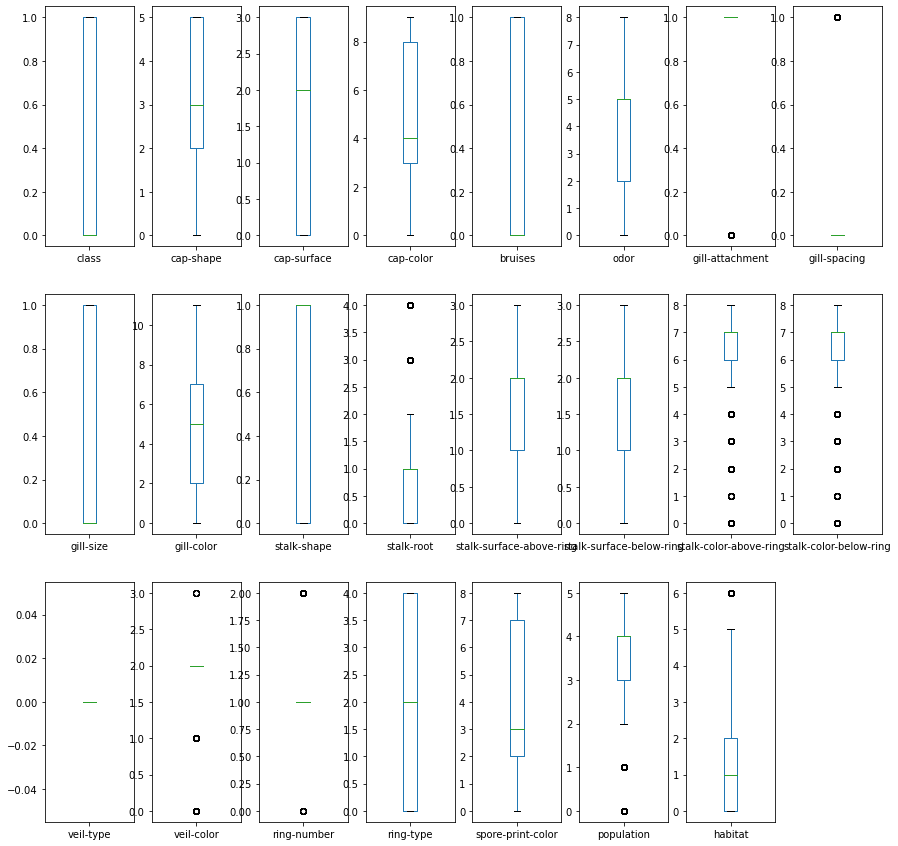

In [13]:
# to have all box plots in the same viz
df.plot(kind="box",subplots=True,layout=(3,8) , figsize=(15,15))

<AxesSubplot:>

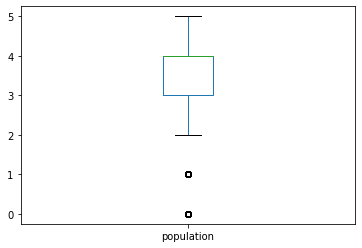

In [14]:
df["population"].plot.box()

Observation- as all the values are in categorical format so considering here is no outlier in any column as converting str to nummbers can give different picture of statistical  figures 

<AxesSubplot:xlabel='population', ylabel='Density'>

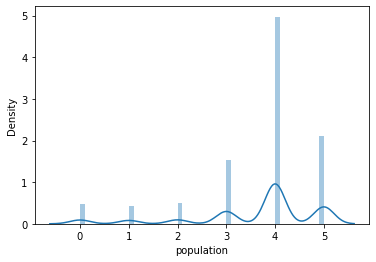

In [15]:
sns.distplot(df["population"])

observation- As  the data is not normally dirtributed so in the box plot in above lot shows like having outliers 

In [16]:
#sns.pairplot(df,hue="class")

In [17]:
cor=df.corr()
round(cor,2) 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.00,0.05,0.18,-0.03,-0.50,-0.09,0.13,-0.35,0.54,-0.53,...,-0.30,-0.15,-0.15,NaN,0.15,-0.21,-0.41,0.17,0.30,0.22
cap-shape,0.05,1.00,-0.05,-0.05,-0.04,-0.02,0.08,0.01,0.05,-0.01,...,-0.03,-0.03,-0.03,NaN,0.07,-0.11,-0.03,-0.07,0.06,-0.04
cap-surface,0.18,-0.05,1.00,-0.02,0.07,0.05,-0.03,-0.28,0.21,-0.16,...,0.11,0.07,0.07,NaN,-0.02,-0.03,-0.11,0.23,0.02,0.16
cap-color,-0.03,-0.05,-0.02,1.00,-0.00,-0.39,0.04,0.14,-0.17,0.08,...,-0.05,0.00,0.01,NaN,0.04,-0.01,0.16,-0.29,-0.14,0.03
bruises,-0.50,-0.04,0.07,-0.00,1.00,-0.06,0.14,-0.30,-0.37,0.53,...,0.46,0.08,0.09,NaN,0.12,0.06,0.69,-0.29,0.09,-0.08
odor,-0.09,-0.02,0.05,-0.39,-0.06,1.00,-0.06,0.06,0.31,-0.13,...,0.06,0.17,0.17,NaN,-0.06,0.11,-0.28,0.47,-0.04,-0.03
gill-attachment,0.13,0.08,-0.03,0.04,0.14,-0.06,1.00,0.07,0.11,-0.13,...,-0.12,0.10,0.10,NaN,0.90,0.09,-0.15,-0.03,0.17,-0.03
gill-spacing,-0.35,0.01,-0.28,0.14,-0.30,0.06,0.07,1.00,-0.11,0.10,...,-0.21,0.27,0.25,NaN,0.07,0.24,-0.20,0.05,-0.53,-0.15
gill-size,0.54,0.05,0.21,-0.17,-0.37,0.31,0.11,-0.11,1.00,-0.52,...,0.01,0.30,0.28,NaN,0.10,-0.17,-0.46,0.62,0.15,0.16
gill-color,-0.53,-0.01,-0.16,0.08,0.53,-0.13,-0.13,0.10,-0.52,1.00,...,0.26,-0.06,-0.07,NaN,-0.10,0.10,0.63,-0.42,-0.03,-0.20


<AxesSubplot:>

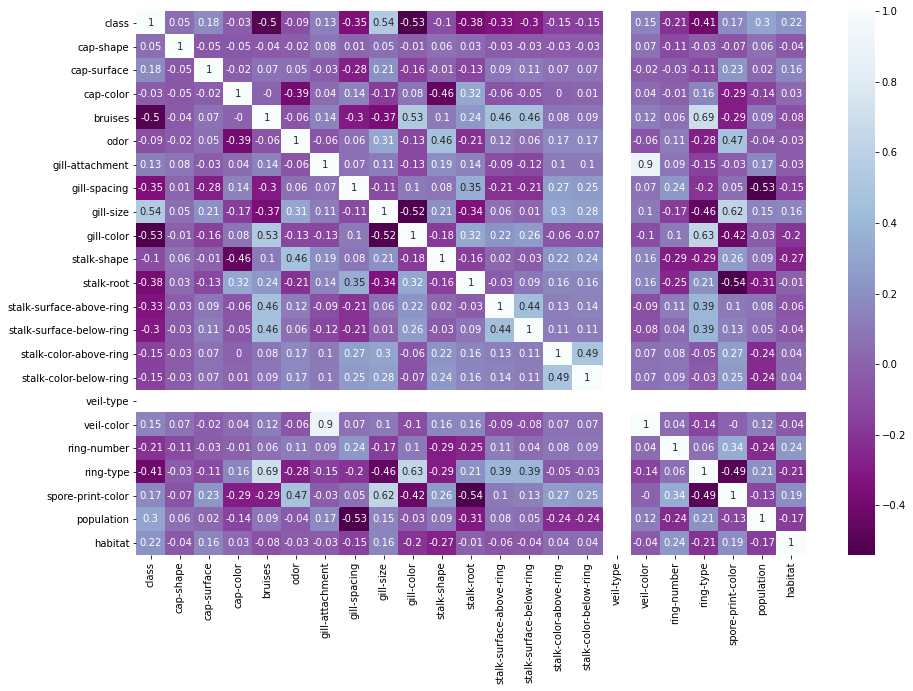

In [18]:

plt.figure(figsize=(15,10))
sns.heatmap(round(cor,2),annot=True,cmap="BuPu_r")


Observation-veil type is encoded and has one value currently encoded as 0 so it shows no relation with any column 
yet  as it is same for all the column so presence/absence of it makes no difference in the outcome . based on that Dropping that specific column  . 


In [19]:
df.drop("veil-type", axis=1, inplace=True)

In [20]:
df.shape

(8124, 22)

In [21]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


<AxesSubplot:>

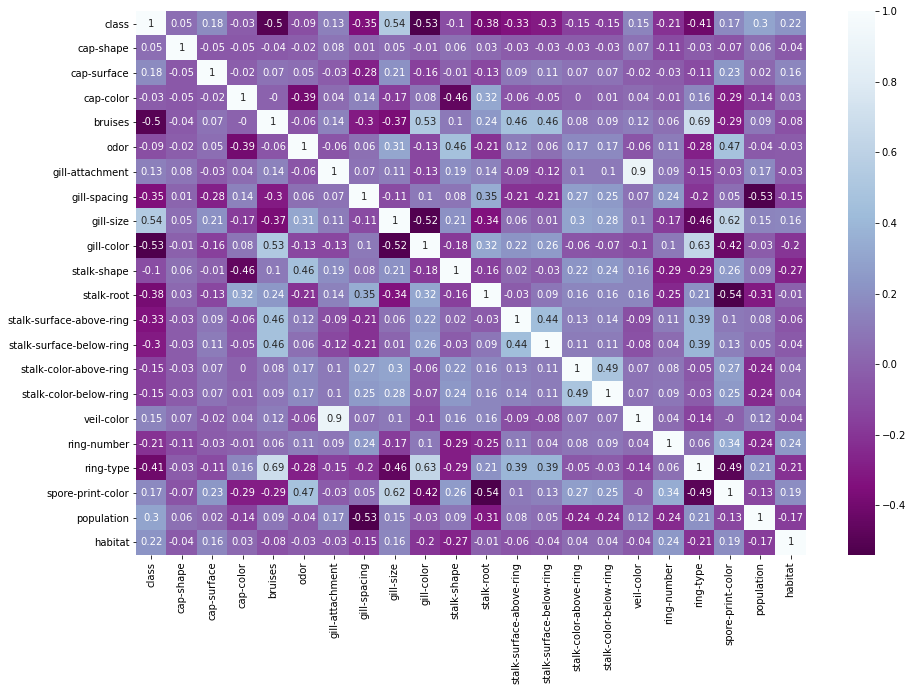

In [22]:
cor2=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(round(cor2,2),annot=True,cmap="BuPu_r")#cmap="BuPu_r"

Observation-veil colour and gill-attachments  have high coleanrity- 0.9

#### chceking the multi colenearity 

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
def calc_vif(ds):
    vif=pd.DataFrame()
    vif["variables"]=ds.columns
    vif["VIF FACTOR"]=[variance_inflation_factor (ds.values,i) for i in range (ds.shape[1])]
    return (vif)


In [25]:
calc_vif(df)

,variables,VIF FACTOR
0,class,7.320778
1,cap-shape,5.464170
2,cap-surface,3.970695
3,cap-color,5.958756
4,bruises,9.277313
5,odor,9.052766
6,gill-attachment,256.849199
7,gill-spacing,5.241245
8,gill-size,7.062200
9,gill-color,6.308226


In [26]:
df.drop("veil-color",axis=1,inplace=True)

In [27]:
calc_vif(df)

,variables,VIF FACTOR
0,class,6.797745
1,cap-shape,5.426545
2,cap-surface,3.947932
3,cap-color,5.882005
4,bruises,9.037578
5,odor,8.992672
6,gill-attachment,70.911113
7,gill-spacing,5.241208
8,gill-size,6.739856
9,gill-color,6.082380


<AxesSubplot:>

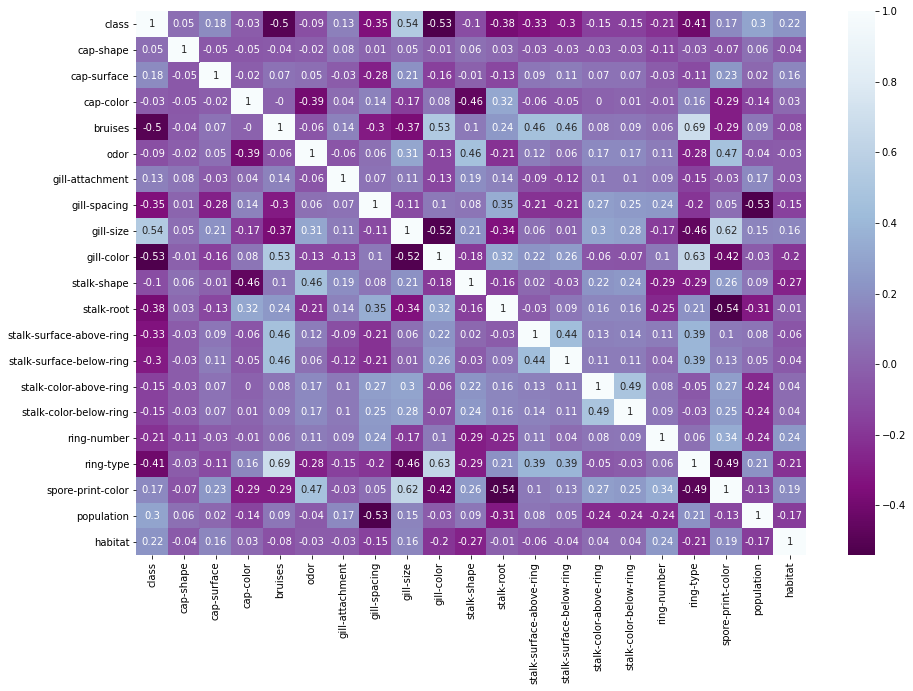

In [28]:
cor3=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(round(cor3,2),annot=True,cmap="BuPu_r")#cmap="BuPu_r"

Observation- after dropping 1 column  the multicolenearity has come down significatnlty so to avoid data loss , not deleting any more column 

In [29]:
df.shape

(8124, 21)

In [30]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

#### parting the  data frame for train and test 

In [31]:
df
x=df.drop("class",axis=1)
y=df["class"]


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

#### finding the best random state

In [33]:
for i in range (200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100,"random state",i)

100.0 random state 0
100.0 random state 1
100.0 random state 2
100.0 random state 3
100.0 random state 4
100.0 random state 5
100.0 random state 6
100.0 random state 7
100.0 random state 8
100.0 random state 9
100.0 random state 10
100.0 random state 11
100.0 random state 12
100.0 random state 13
100.0 random state 14
100.0 random state 15
100.0 random state 16
100.0 random state 17
100.0 random state 18
100.0 random state 19
100.0 random state 20
100.0 random state 21
100.0 random state 22
100.0 random state 23
100.0 random state 24
100.0 random state 25
100.0 random state 26
100.0 random state 27
100.0 random state 28
100.0 random state 29
100.0 random state 30
100.0 random state 31
100.0 random state 32
100.0 random state 33
100.0 random state 34
100.0 random state 35
100.0 random state 36
100.0 random state 37
100.0 random state 38
100.0 random state 39
100.0 random state 40
100.0 random state 41
100.0 random state 42
100.0 random state 43
100.0 random state 44
100.0 random state 4

In [34]:
#saving best random state 
maxAccuracy=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccuracy:
        maxAccuracy=accu
        maxRS=i

print("best accuracy  is ",maxAccuracy, "with random state ",maxRS)

best accuracy  is  1.0 with random state  1


In [35]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



In [37]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
acc1=classification_report(y_test,pred)
print(acc1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [38]:
MNB=MultinomialNB()
MNB.fit(x_train,y_train)
pred=MNB.predict(x_test)
acc2=classification_report(y_test,pred)
print(acc2)

              precision    recall  f1-score   support

           0       0.74      0.93      0.82      1236
           1       0.90      0.66      0.76      1202

    accuracy                           0.80      2438
   macro avg       0.82      0.80      0.79      2438
weighted avg       0.82      0.80      0.79      2438



In [39]:
SVCc=SVC()
SVCc.fit(x_train,y_train)
pred=SVCc.predict(x_test)
acc3=classification_report(y_test,pred)
print(acc3)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1236
           1       1.00      0.98      0.99      1202

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



In [40]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
pred=KNN.predict(x_test)
acc3=classification_report(y_test,pred)
print(acc3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [41]:
from sklearn.model_selection import cross_val_score

#### Finding the best model with cross validation 

In [42]:
models=(DTC,KNN,SVCc,MNB)
for i in models:
    print (i , cross_val_score(i,x,y,cv=5).mean())

DecisionTreeClassifier() 0.9610985979537704
KNeighborsClassifier() 0.8815549071618036
SVC() 0.8422768472906403
MultinomialNB() 0.72463728685108


In [43]:
 print (cross_val_score(DTC,x,y,cv=5).mean())

0.9335075407351269


In [44]:
 print (cross_val_score(KNN,x,y,cv=5).mean())

0.8815549071618036


In [45]:
 print (cross_val_score(SVCc,x,y,cv=5).mean())

0.8422768472906403


In [46]:
 print (cross_val_score(MNB,x,y,cv=5).mean())

0.72463728685108


Observation - KNN is having the minimum difference between cross val score and  model accuracy score 

### using hyper parameter 

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
parameters={"weights":["uniform","distance"],
            "metric":["minkowski","callable"],
            "leaf_size":np.arange(1,30),
           "n_neighbors":np.arange(1,5)}

In [49]:
GCV=GridSearchCV(KNeighborsClassifier(),parameters,cv=5)

In [50]:
KNN.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [51]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'metric': ['minkowski', 'callable'],
                         'n_neighbors': array([1, 2, 3, 4]),
                         'weights': ['uniform', 'distance']})

In [52]:
GCV.best_params_

{'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}

### final model selection 

In [53]:
final_model=KNeighborsClassifier(leaf_size=1, metric='minkowski',n_neighbors=1,weights='uniform')
final_model.fit(x_train ,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print (acc*100)

99.95898277276456


In [54]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [55]:
pred_y_proba=final_model.predict_proba(x_test)[:,1]

In [56]:
pred_y_proba

array([0., 1., 1., ..., 1., 0., 1.])

In [57]:
# constant synax #
fpr,tpr,thresholds=roc_curve(y_test, pred_y_proba)

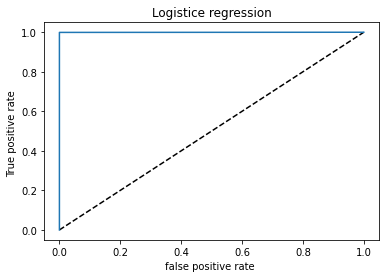

In [58]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr ,tpr,label="final_model")
plt.xlabel("false positive rate ")
plt.ylabel( "True positive rate ")
plt.title( "Logistice regression" )
plt.show()

### Saving model 

In [59]:
import joblib

In [60]:
joblib.dump(final_model,"mush_final.pkl")

['mush_final.pkl']